# Modelling

## Notebook Summary


Linear Model Implementation

## Notebook Setup

In [67]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# Loading sklearn functionality
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_classif, f_regression
from sklearn.pipeline import make_pipeline

# Set global random seed for reproducibility
random_seed_val = 42
np.random.seed(random_seed_val)

## Data Loading & Understanding

In [53]:
# Creating DataFrame
pp_house_df = pd.read_csv("london_house_price_data_pp.csv")
# Viewing DataFrame
pp_house_df.head(5)

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,saleEstimate_currentPrice,tenure_Feudal,tenure_Freehold,tenure_Leasehold,...,propertyType_Mid Terrace House,propertyType_Mid Terrace Property,propertyType_Purpose Built Flat,propertyType_Semi-Detached Bungalow,propertyType_Semi-Detached House,propertyType_Semi-Detached Property,propertyType_Terrace Property,propertyType_Terraced,propertyType_Terraced Bungalow,currentEnergyRating_encoded
0,51.495505,-0.132379,2.0,2.0,71.0,1.0,759000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,51.478185,-0.092201,1.0,1.0,64.0,1.0,388000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,51.588774,-0.139599,1.0,4.0,137.0,2.0,1261000.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,51.466089,0.006967,1.0,2.0,97.0,1.0,944000.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,51.451327,-0.007569,1.0,3.0,135.0,2.0,726000.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0


In [54]:
# Columns and data types
pp_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265911 entries, 0 to 265910
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   latitude                             265911 non-null  float64
 1   longitude                            265911 non-null  float64
 2   bathrooms                            265911 non-null  float64
 3   bedrooms                             265911 non-null  float64
 4   floorAreaSqM                         265911 non-null  float64
 5   livingRooms                          265911 non-null  float64
 6   saleEstimate_currentPrice            265911 non-null  float64
 7   tenure_Feudal                        265911 non-null  float64
 8   tenure_Freehold                      265911 non-null  float64
 9   tenure_Leasehold                     265911 non-null  float64
 10  tenure_Shared                        265911 non-null  float64
 11  propertyType_

In [55]:
# Shape of the DataFrame
pp_house_df.shape

(265911, 31)

## Preparing Data

In [56]:
# Seperating features from target
X = pp_house_df.drop('saleEstimate_currentPrice', axis=1)
y = pp_house_df['saleEstimate_currentPrice']

In [57]:
# Remainder test split
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.20, random_state=random_seed_val)

# Train validation split
X_train, X_valid, y_train, y_valid = train_test_split(X_remainder, y_remainder, test_size=0.20, random_state=random_seed_val)

# Checking size of split
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_valid)}") 
print(f"Test set size: {len(X_test)}")

Training set size: 170182
Validation set size: 42546
Test set size: 53183


## Linear Modelling

Implementation of predicitive models which assume that only linear relationships exist between the target and the features.

### Linear Regression 

The performance of this simple linear model will be used as a baseline for future linear models for comparison. Default hyperparameters used, no tuning required.

In [58]:
# Defining model
lin_reg_model = LinearRegression()

# Fitting model
lin_reg_model.fit(X_train, y_train)

# Scoring on train
train_score = lin_reg_model.score(X_train, y_train)

# Scoring on validation
valid_score = lin_reg_model.score(X_valid, y_valid)

# Print performance
print(f"The R^2 value for the training set is {train_score} and the R^2 value for the validation set is {valid_score}")


The R^2 value for the training set is 0.6653665262561964 and the R^2 value for the validation set is 0.653085266533795


**Model Performance**

The close alignment between the training and validation R^2 scores suggests that the model generalizes effectively to unseen data without overfitting. The R^2 values indicate that the model explains around 74% of the variance in the target variable, the model captures a significant portion of the underlying patterns in the data. 

In [59]:
# Coefficients
lin_reg_model.coef_

# Coefficient and Feature DataFrame
coeff_df = pd.DataFrame(lin_reg_model.coef_, index=X_train.columns, columns = ["coeffeicent"] )

# Reset index to turn the index into a column
coeff_df.reset_index(inplace=True)

# Rename columns appropriately
coeff_df.columns = ['Feature', 'Coefficient']

# Display DataFrame
print(coeff_df)

                                Feature   Coefficient
0                              latitude -6.876074e+04
1                             longitude -1.207547e+06
2                             bathrooms  2.444090e+05
3                              bedrooms -1.354315e+05
4                          floorAreaSqM  1.083178e+04
5                           livingRooms  5.694959e+04
6                         tenure_Feudal  6.062305e+03
7                       tenure_Freehold -2.470203e+05
8                      tenure_Leasehold -1.238164e+03
9                         tenure_Shared  2.421961e+05
10       propertyType_Bungalow Property  4.121242e+04
11          propertyType_Converted Flat -1.501776e+05
12       propertyType_Detached Bungalow -4.866534e+04
13          propertyType_Detached House -7.282706e+03
14       propertyType_Detached Property -1.154681e+05
15    propertyType_End Terrace Bungalow  1.003000e+05
16       propertyType_End Terrace House  1.113988e+04
17    propertyType_End Terra

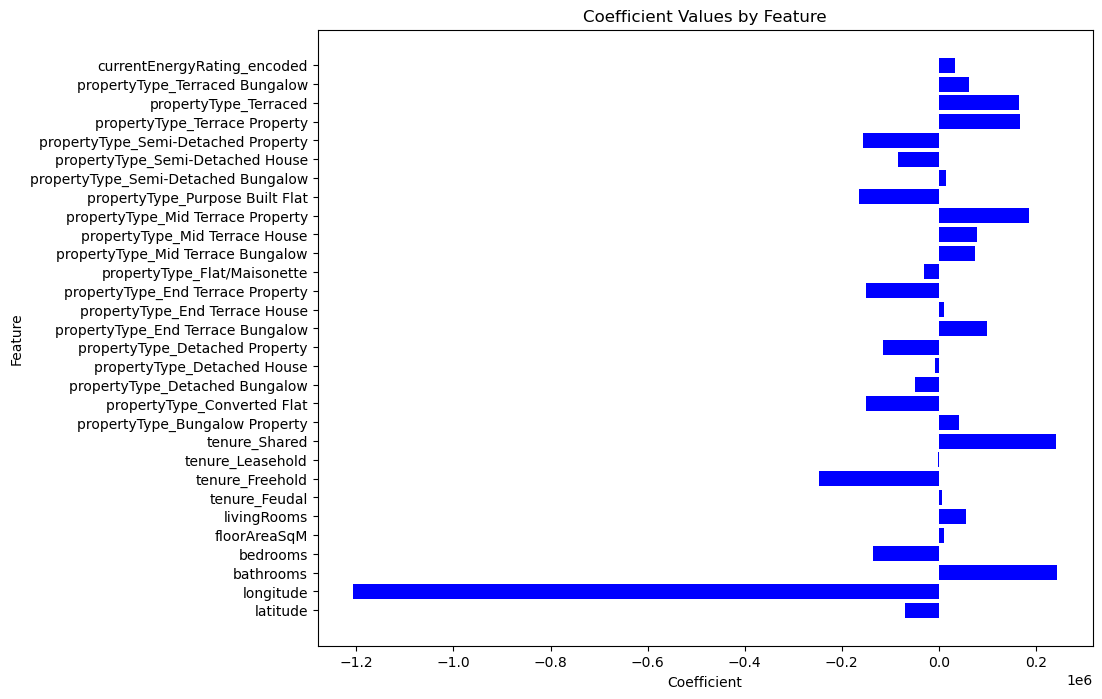

In [60]:
# Create a bar chart
plt.figure(figsize=(10, 8))  
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='blue')  
plt.xlabel('Coefficient') 
plt.ylabel('Feature')  
plt.title('Coefficient Values by Feature')  
plt.show()  


**Interpretation of Coefficients - Key Insights**

The model mostly captures expected trends but shows anomalies such as bedrooms, Freehold, Semi-Detached House, Purpose Built Flat.More bedrooms typically elevate property prices however, the model unexpectedly indicates the opposite. Generally, freehold properties command higher values compared to leasehold or feudal ones but the alternative is suggested by a strong negative coefficient. 

Semi-detached houses are also unexpectedly associated with a negative coefficient, when they are usually priced above terraced homes or flats. Although flats tend to be more affordable, the size of the coefficient associated with them is unusually large.Additionally, the extremely large negative coefficient for longitude indicates an unusually high influence

These anomalous results may stem from multicollinearity, data quality issues, or model limitations. Further refinement, such as scaling or regularization must be performed to improve accuracy and interpretability.




## Ridge Regression
Ridge regression is essential for handling anomalies, it will handle multicollinearity and stabilize coefficients. The model will be implemented with varying alpha values to examine which value of alpha provides optimal performance.

#### Ridge Regression - Validation set method

In [101]:
# Make copy of data before scaling
X_train_ridge = X_train.copy()
X_valid_ridge = X_valid.copy()

# Define alpha values
alpha_values = [10**i for i in range(-10, 11)]

# Dictionary to hold scores for each alpha
ridge_scores = {}

# Scaler
scaler = StandardScaler()
cols_to_scale = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms']

# SCALING TRAIN DATA:

# Fit scaler
scaler.fit(X_train_ridge[cols_to_scale]) 

# Transform cols
X_scaled_cols = scaler.transform(X_train_ridge[cols_to_scale])  

# Convert scaled columns back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled_cols, columns=cols_to_scale, index=X_train_ridge.index)

# Drop the original unscaled columns from train
X_train_ridge.drop(cols_to_scale, axis=1, inplace=True)

# Concatenate the scaled DataFrame with the remaining part of the original DataFrame
X_train_scaled = pd.concat([X_scaled_df, X_train_ridge], axis=1)

# SCALING VALIDATION DATA:

# Fit scaler
scaler.fit(X_valid_ridge[cols_to_scale]) 

# Transform cols
X_scaled_cols = scaler.transform(X_valid_ridge[cols_to_scale])  

# Convert scaled columns back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled_cols, columns=cols_to_scale, index=X_valid_ridge.index)

# Drop the original unscaled columns from valid
X_valid_ridge.drop(cols_to_scale, axis=1, inplace=True)

# Concatenate the scaled DataFrame with the remaining part of the original DataFrame
X_valid_scaled = pd.concat([X_scaled_df, X_valid_ridge], axis=1)

for alpha in alpha_values:
    # Instantiate model with alpha value
    ridge_model = Ridge(alpha=alpha)

    # Fit model on scaled training data
    ridge_model.fit(X_train_scaled, y_train)

    # Score model on scaled training and validation data
    train_score_val = ridge_model.score(X_train_scaled, y_train)
    valid_score_val = ridge_model.score(X_valid_scaled, y_valid)

    # Store scores in dictionary under the alpha key
    ridge_scores[alpha] = {'train_score': train_score_val, 'valid_score': valid_score_val}



c:\Users\sanja\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.09862e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


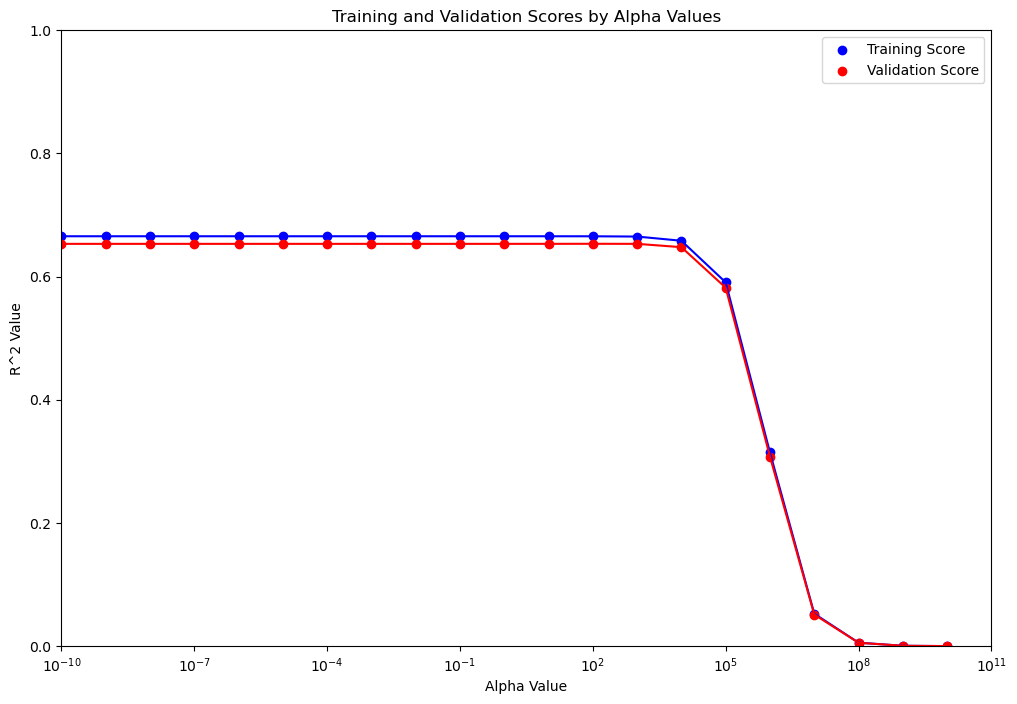

In [102]:
# Plotting scores against alpha

# Creating scatter plot with two lines
plt.figure(figsize=(12, 8))
plt.scatter(alpha_values, [ridge_scores[alpha]['train_score'] for alpha in alpha_values], color='blue', label='Training Score')
plt.scatter(alpha_values, [ridge_scores[alpha]['valid_score'] for alpha in alpha_values], color='red', label='Validation Score')
plt.plot(alpha_values, [ridge_scores[alpha]['train_score'] for alpha in alpha_values], color='blue')
plt.plot(alpha_values, [ridge_scores[alpha]['valid_score'] for alpha in alpha_values], color='red')

# Logarithmic scale for the x-axis
plt.xscale('log')

# Set x-axis and y-axis limits
plt.xlim(left=1e-10) 
plt.ylim(bottom=0, top=1.0)

# Labels and Title
plt.xlabel('Alpha Value')
plt.ylabel('R^2 Value')
plt.title('Training and Validation Scores by Alpha Values')
plt.legend()

# Show plot
plt.show()



**Training and Validation Score Plot Observations**

Both the training and validation scores remain almost constant across all tested alpha values. The R^2 values for both are consistently around 0.64 for training and validation respectively, indicating a good fit. The values' closeness to 1 indicate that the model explains a large proportion of the variance in the dependent variable. 

There is no discernible gap between the training and validation scores. This closeness suggests that the model is neither overfitting nor underfitting significantly. The plot unfortunately does not show which value of alpha is the optimal value for the model.

**Alpha value**

From the plot above, it can be seen that an alpha = 100 is one of the values that provides a good fit. This parameter will be used for performance on final model.


In [106]:
# Final model evaluation with the test set

# Make copy of data before scaling
X_remainder_ridge = X_remainder.copy()
X_test_ridge = X_test.copy()

# Scaler
scaler = StandardScaler()
cols_to_scale = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms']

# SCALING REMAINDER DATA:

# Fit scaler
scaler.fit(X_remainder_ridge[cols_to_scale]) 

# Transform cols
X_scaled_cols = scaler.transform(X_remainder_ridge[cols_to_scale])  

# Convert scaled columns back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled_cols, columns=cols_to_scale, index=X_remainder_ridge.index)

# Drop the original unscaled columns from remainder
X_remainder_ridge.drop(cols_to_scale, axis=1, inplace=True)

# Concatenate the scaled DataFrame with the remaining part of the original DataFrame
X_remainder_scaled = pd.concat([X_scaled_df, X_remainder_ridge], axis=1)

# SCALING TEST DATA:

# Fit scaler
scaler.fit(X_test_ridge[cols_to_scale]) 

# Transform cols
X_scaled_cols = scaler.transform(X_test_ridge[cols_to_scale])  

# Convert scaled columns back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled_cols, columns=cols_to_scale, index=X_test_ridge.index)

# Drop the original unscaled columns from test
X_test_ridge.drop(cols_to_scale, axis=1, inplace=True)

# Concatenate the scaled DataFrame with the remaining part of the original DataFrame
X_test_scaled = pd.concat([X_scaled_df, X_test_ridge], axis=1)

# TESTING MODEL:

# Instantiate model with alpha value
final_ridge_model = Ridge(alpha=100)

# Fit model on scaled remainder data
final_ridge_model.fit(X_remainder_scaled, y_remainder)

# Test
print(f"Test set accuracy: {final_ridge_model.score(X_test_scaled, y_test):.4f}")


Test set accuracy: 0.6505


#### Ridge Regression - Cross validation method

In [104]:
# Store the results
cross_validation_scores = []

# Make copy of data before scaling
X_remainder_ridge_cv = X_remainder.copy()

# Scaler
scaler = StandardScaler()
cols_to_scale = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms']

# Fit scaler
scaler.fit(X_remainder_ridge_cv[cols_to_scale]) 

# Transform cols
X_scaled_cols = scaler.transform(X_remainder_ridge_cv[cols_to_scale])  

# Convert scaled columns back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled_cols, columns=cols_to_scale, index=X_remainder_ridge_cv.index)

# Drop the original unscaled columns from remainder
X_remainder_ridge_cv.drop(cols_to_scale, axis=1, inplace=True)

# Concatenate the scaled DataFrame with the remaining part of the original DataFrame
X_remainder_scaled_cv = pd.concat([X_scaled_df, X_remainder_ridge_cv], axis=1)

for alpha in alpha_values:
    # Instantiate model with alpha value
    ridge_model_cv = Ridge(alpha=alpha)

    # Fit model on scaled training data
    ridge_model_cv.fit(X_remainder_scaled_cv, y_remainder)

    # The cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(ridge_model_cv, X_remainder_scaled_cv, y_remainder, cv=5))

    # Append the score
    cross_validation_scores.append(cv_score)

c:\Users\sanja\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.50879e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\sanja\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.65514e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\sanja\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.94917e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\sanja\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.06873e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


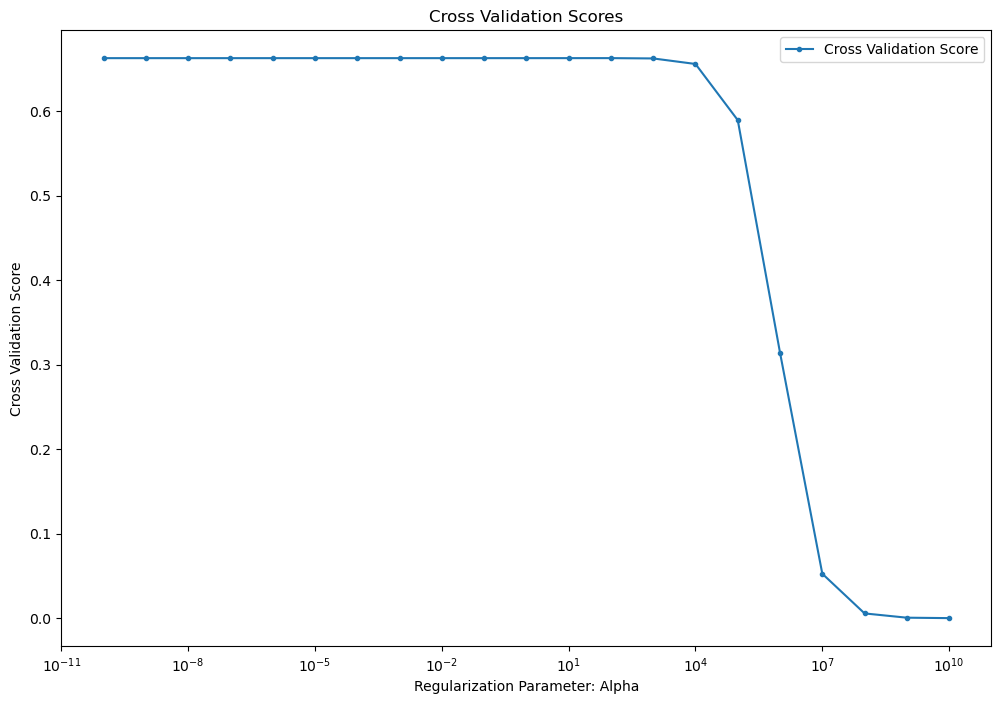

The best model has alpha =  100


In [105]:
# Plotting scores against alpha

# Scatter plot
plt.figure(figsize=(12, 8))
plt.plot(alpha_values, cross_validation_scores, label="Cross Validation Score", marker=".")

# Logarithmic scale for the x-axis
plt.xscale("log")

# Labels and Title
plt.xlabel("Regularization Parameter: Alpha")
plt.ylabel("Cross Validation Score")
plt.title("Cross Validation Scores")
plt.legend()

# Show plot
plt.show()

# Print the optimal alpha
index_of_max = np.array(cross_validation_scores).argmax()
print("The best model has alpha = ", alpha_values[index_of_max])

- Implement one more time with alpha value of 100
- Then get coeffs with feature names for a plot

**Cross Validation Score Observations**

Five different splits of the data have been taken into consideration, suggesting that the model with an alpha value of 100 is the one that fits our data the best.

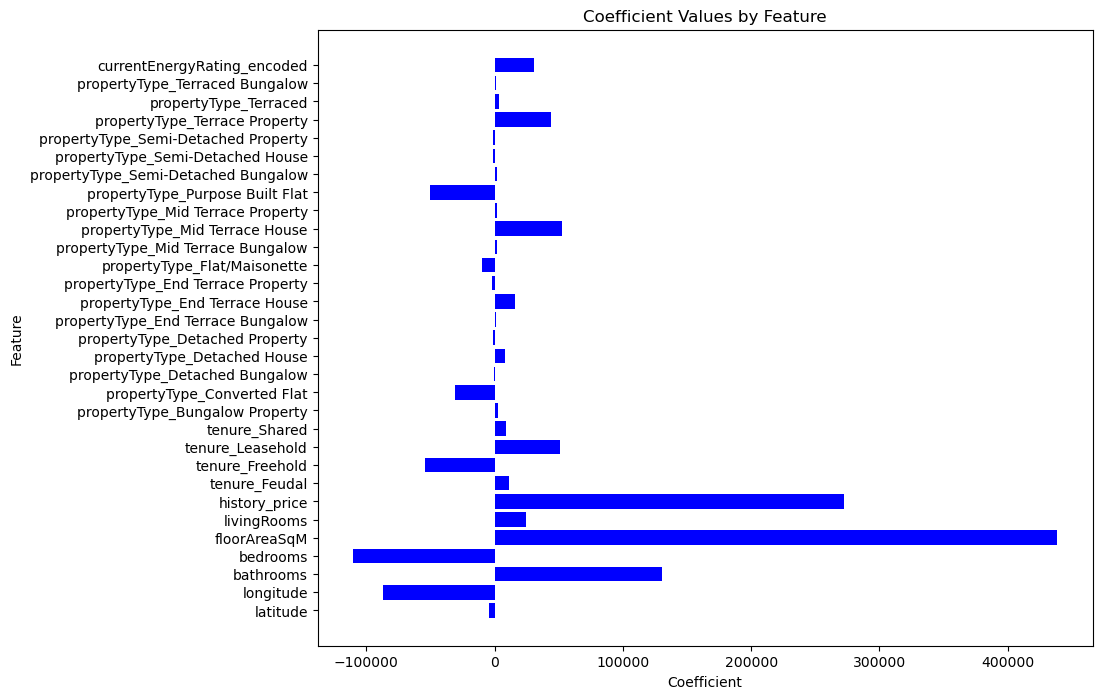

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 8))  
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='blue')  
plt.xlabel('Coefficient') 
plt.ylabel('Feature')  
plt.title('Coefficient Values by Feature')  
plt.show()  

**Interpretation of coefficients**

Ridge regression has improved the model by reducing the magnitude of coefficients and making them more stable, but it hasn't resolved the underlying anomalies.

The persistent anomalies (e.g., negative coefficients for bedrooms and Freehold) suggest deeper issues like multicollinearity, data quality problems, or the need for more sophisticated feature engineering.

To fully address these issues, further steps like checking for multicollinearity, improving data quality, and exploring feature engineering or nonlinear models are necessary.